In [33]:
#Installing the ucimlrepo to import datasets
!pip install ucimlrepo
!pip install keras
!pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.7/390.3 MB 14.6 MB/s eta 0:00:27
   ---------------------------------------- 1.6/390.3 MB 20.1 MB/s eta 0:00:20
   ---------------------------------------- 2.4/390.3 MB 17.2 MB/s eta 0:00:23
   ---------------------------------------- 4.5/390.3 MB 23.9 MB/s eta 0:00:17
    --------------------------------------- 5.9/390.3 MB 25.1 MB/s eta 0:00:16
    --------------------------------------- 7.0/390.3 MB 24.7 MB/s eta 0:00:16
    --------------------------------------- 7.9/390.3 MB 24.0 MB/s eta 0:00:16
    --------------------------------------- 8.7/390.3 MB 23.1 MB/s eta 0:00:17
    --------------------------------------- 9.5/390.3 MB 22.4 MB/s eta 0:00:17
   - -------------------------------------- 10.9/390.3 MB 24.2 MB/s eta 0:00:16
   - -------------------------------------- 12.1/390.3 MB 26.2 MB/s eta 0:00:15
   - -------------------------------------- 13.1/390.3 MB 

In [34]:
#import the most commonly used libraries
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plotting
import seaborn as sns
from ucimlrepo import fetch_ucirepo
# Feature Transformation using StandardScaler and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
# Neural Network using Keras for regression analysis

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


In [12]:
# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

# metadata
print(energy_efficiency.metadata)

# variable information
print(energy_efficiency.variables)

{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y1      768 non-null    float64
 1   Y2      768 non-null    float64
dtypes: float64(2)
memory usage: 12.1 KB


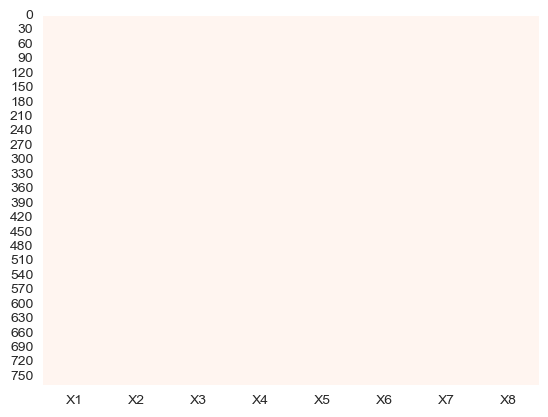

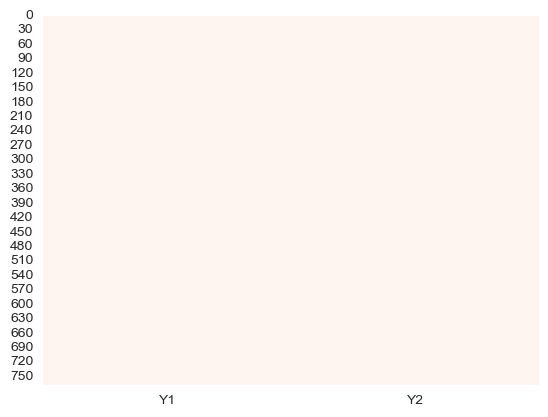

In [13]:
#check the shape of the dataset
X.shape
y.shape
X.info()
y.info()
X.describe()
y.describe()
# Checking for any missing values
X.isnull().sum()
y.isnull().sum()
# Visualize missing values in features in the dataset if any
sns.heatmap(X.isnull(), cbar=False, cmap='Reds')
plotting.show()
sns.heatmap(y.isnull(), cbar=False, cmap='Reds')
plotting.show()

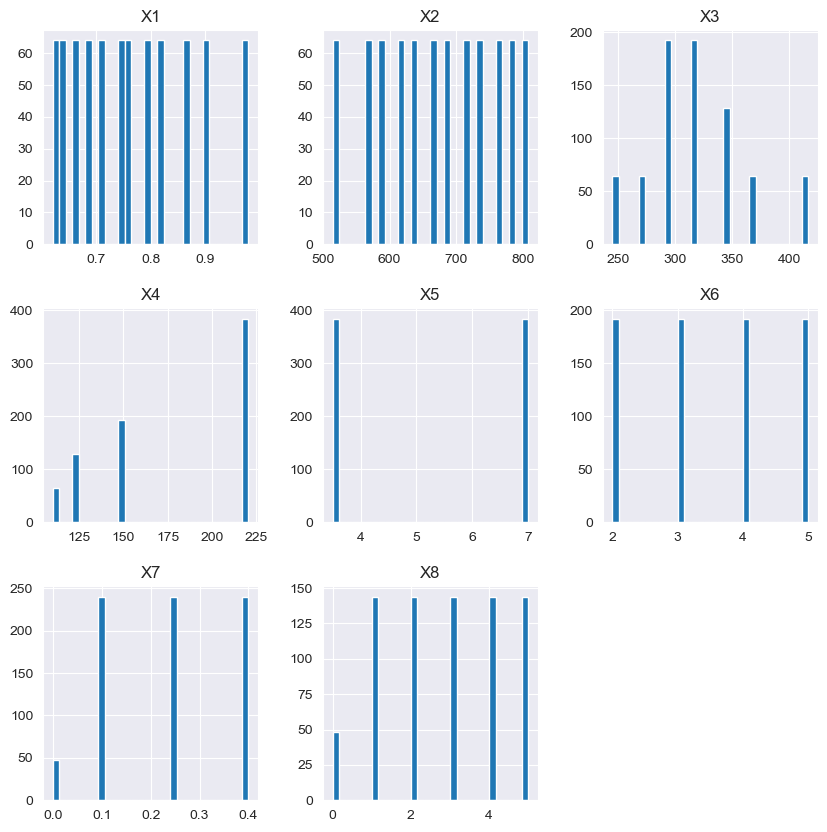

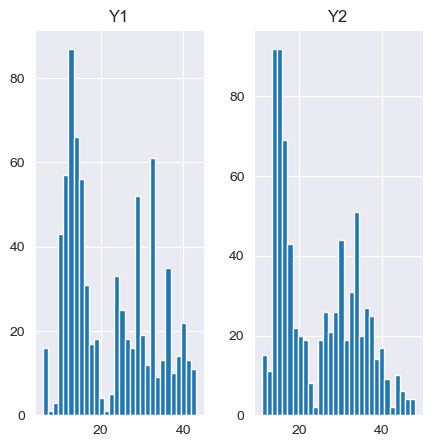

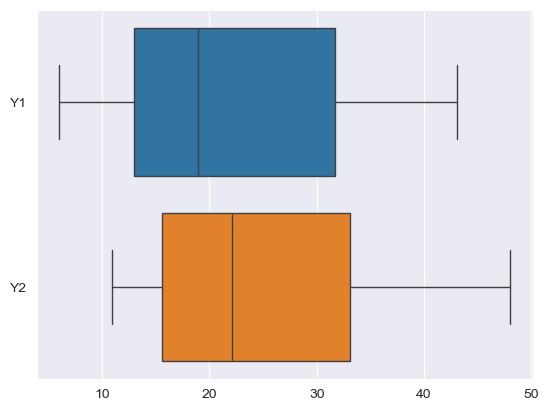

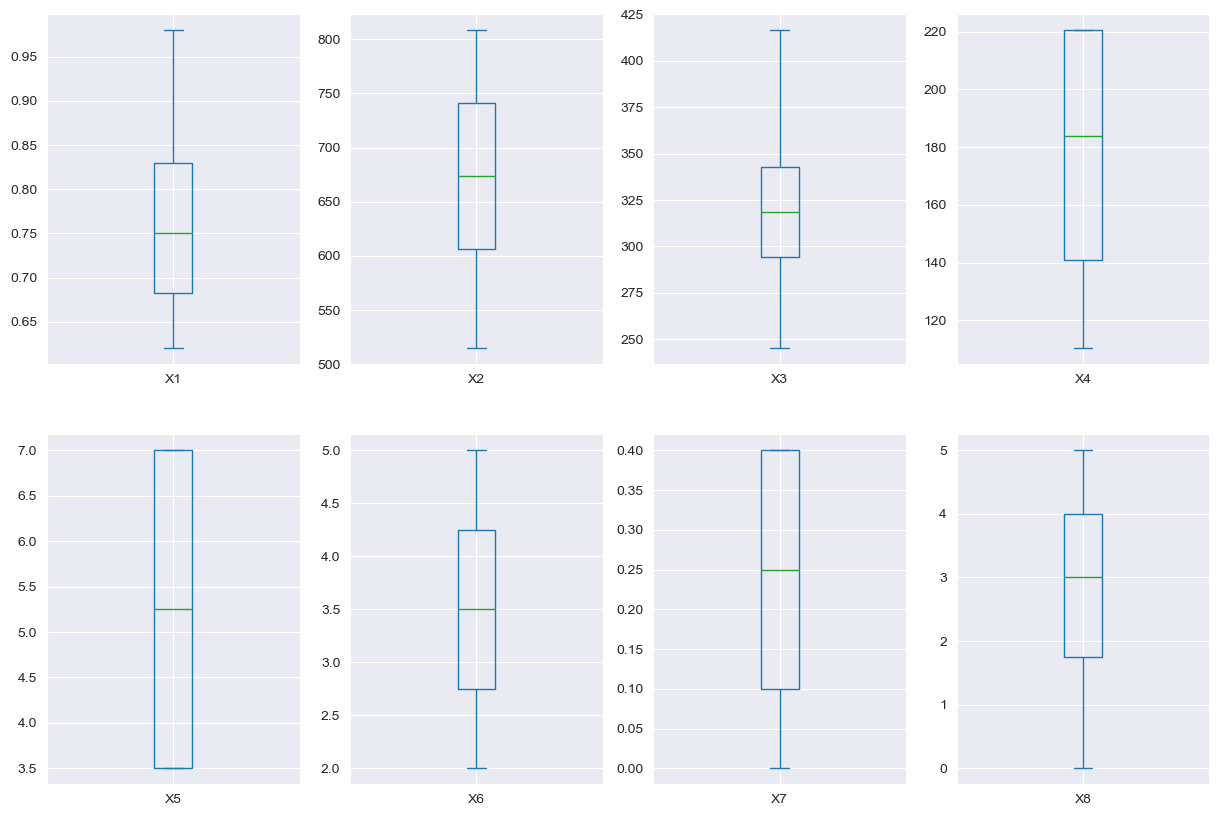

In [14]:
# Visualizing the distribution of the features and targets
#Histogram for features
X.hist(figsize=(10,10), bins=30)
plotting.show()

#Histogram for targets
y.hist(figsize=(5,5), bins=30)
plotting.show()

#Boxplot for targets
sns.boxplot(data=y, orient='h')
plotting.show()

#Box plots for 'numerical' features
X.plot(kind='box', subplots=True, layout=(2,4), figsize=(15,10), sharex=False, sharey=False)
plotting.show()

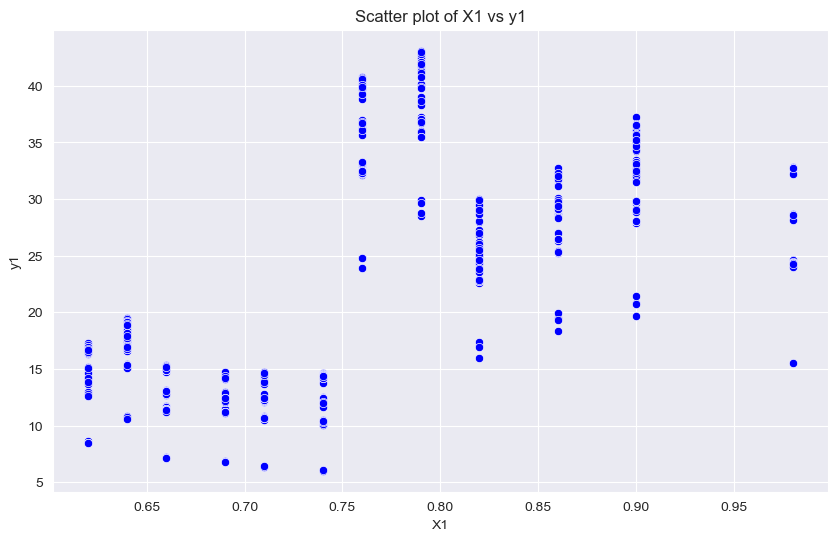

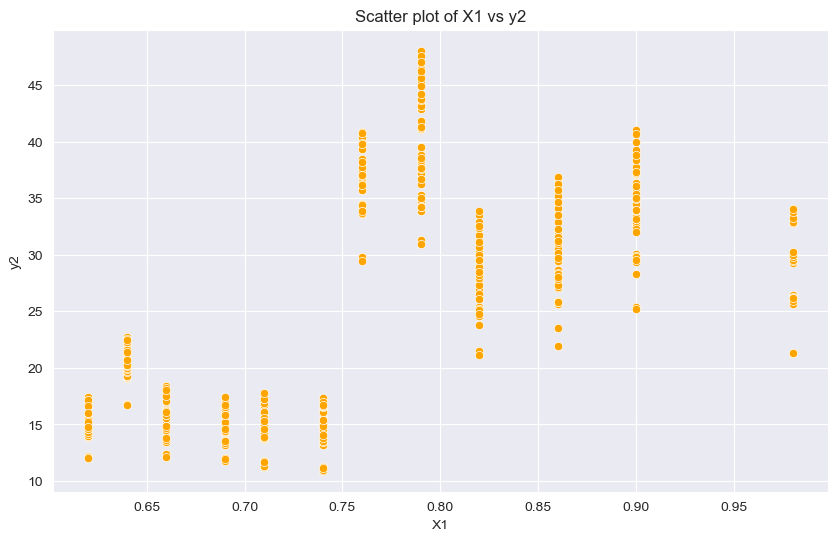

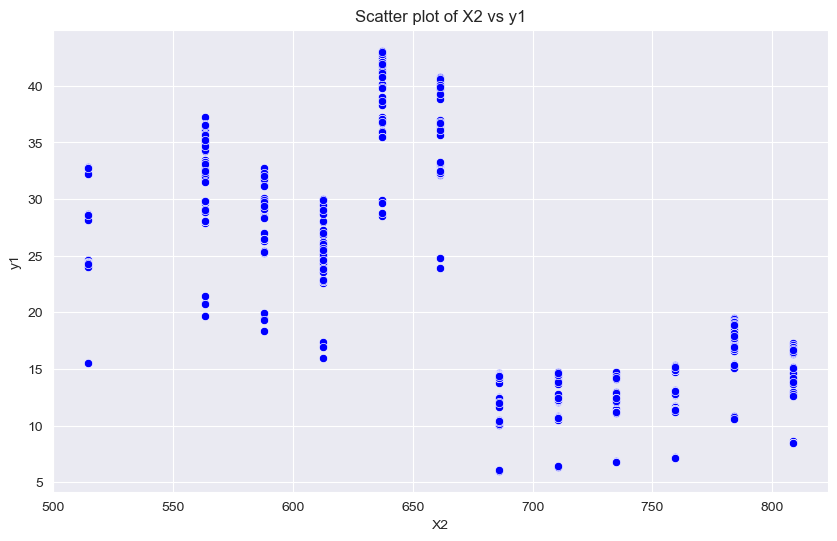

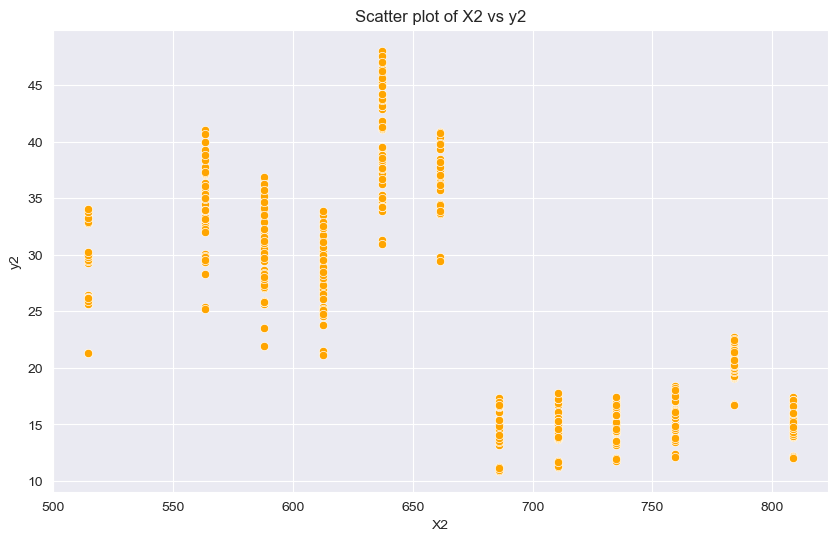

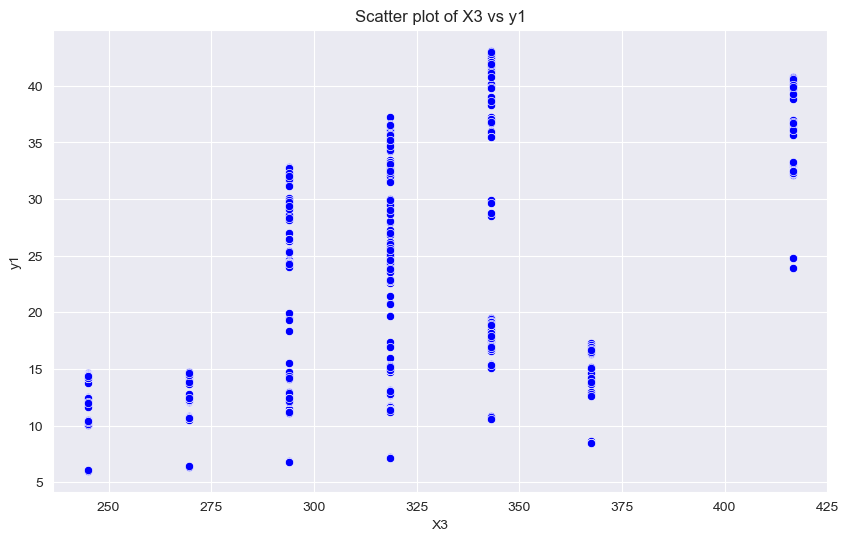

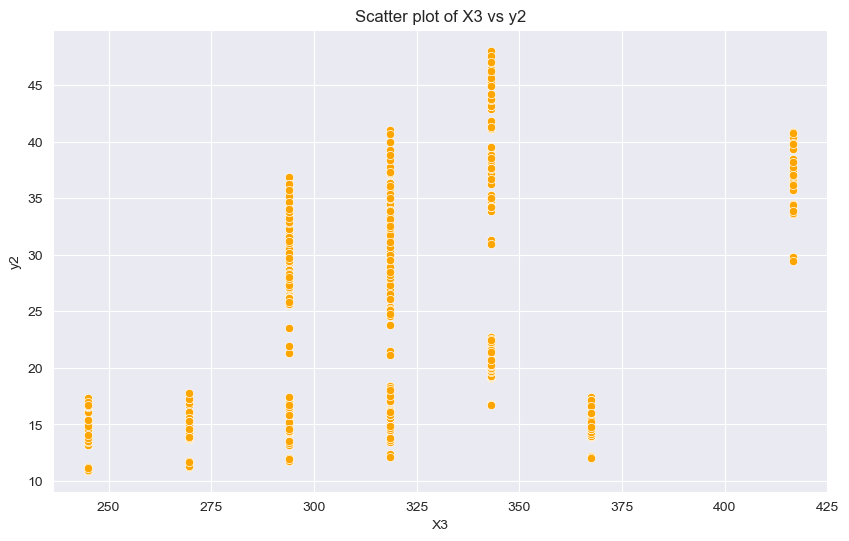

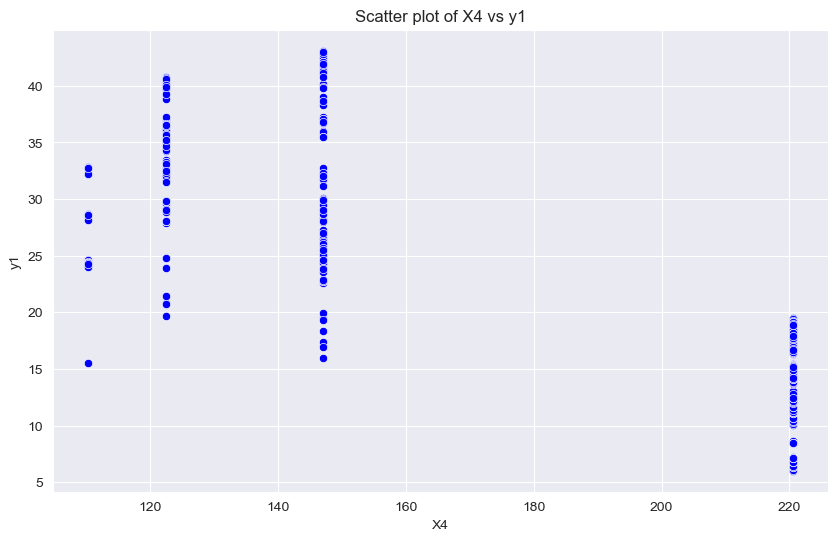

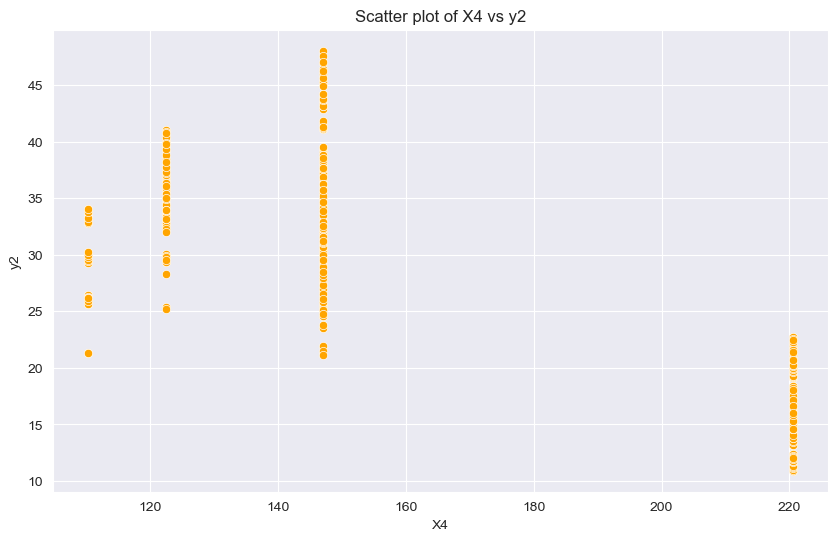

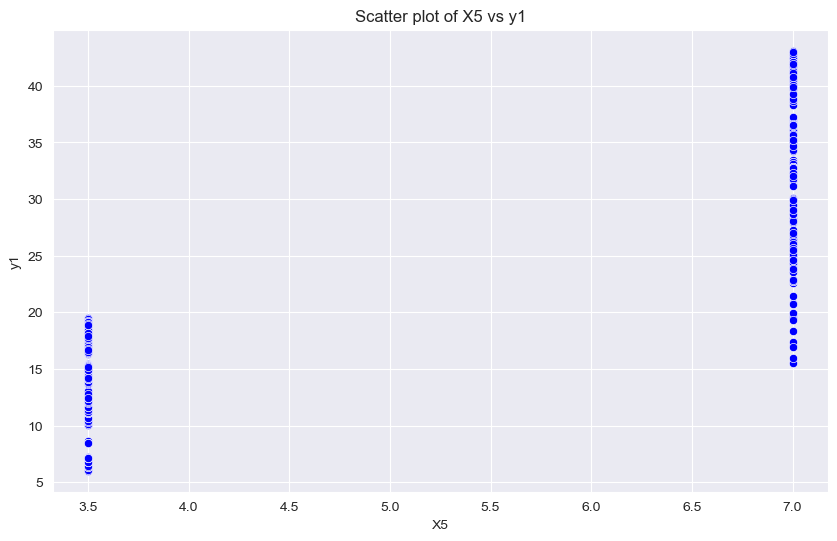

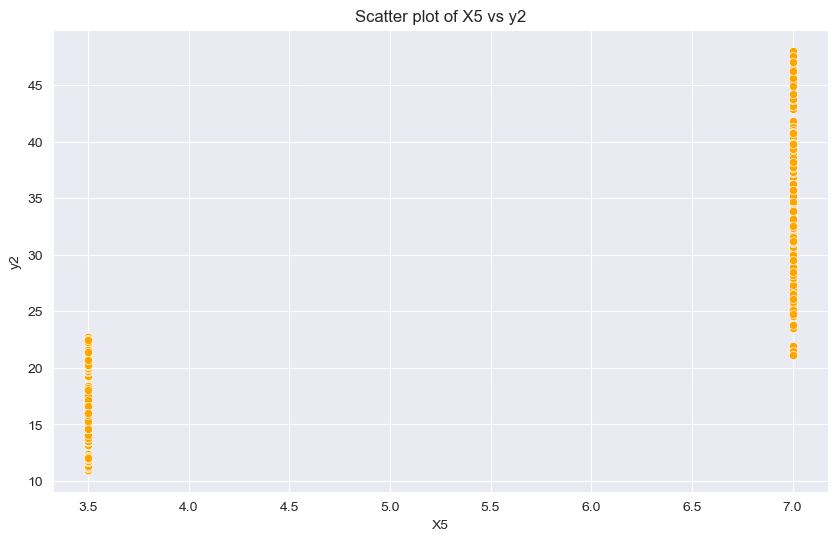

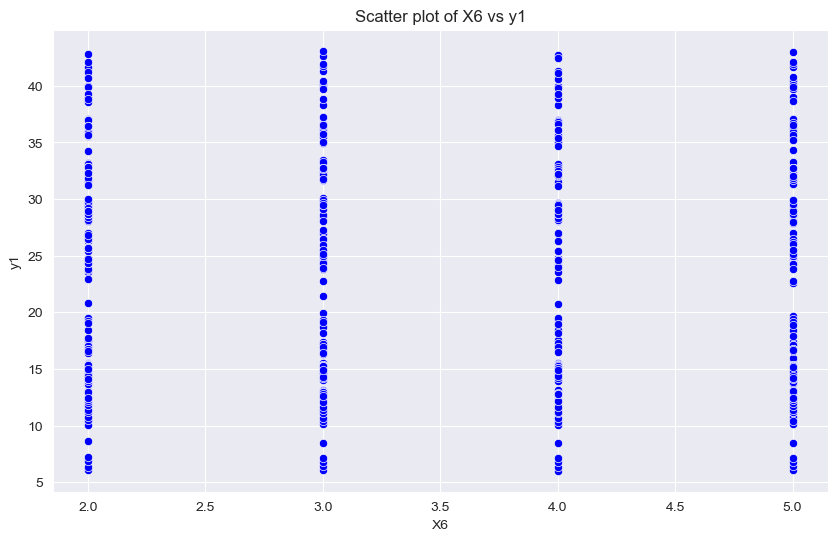

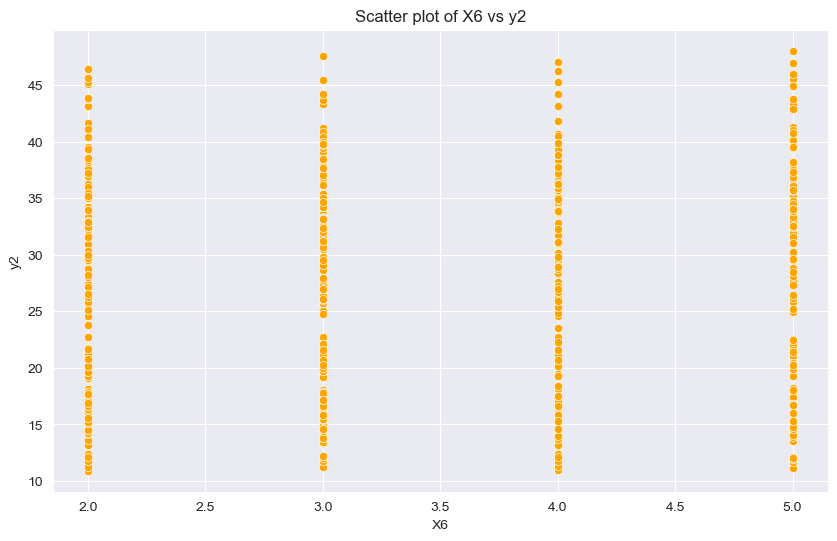

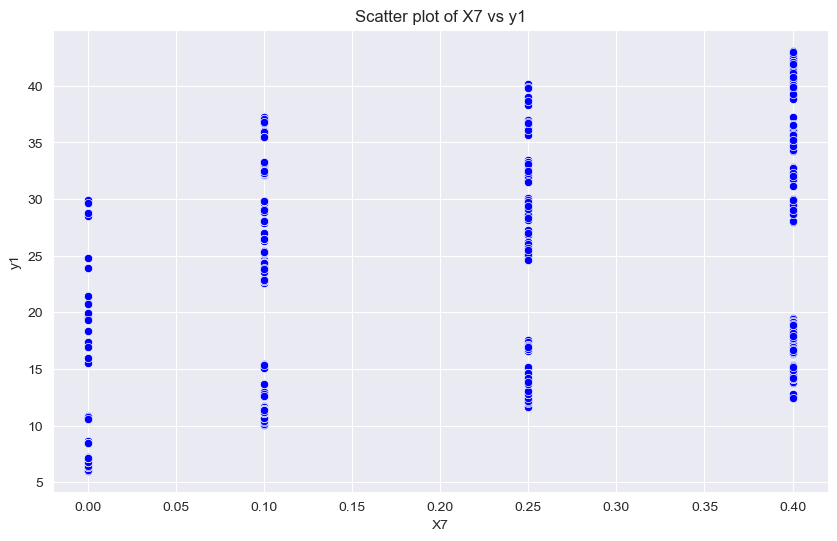

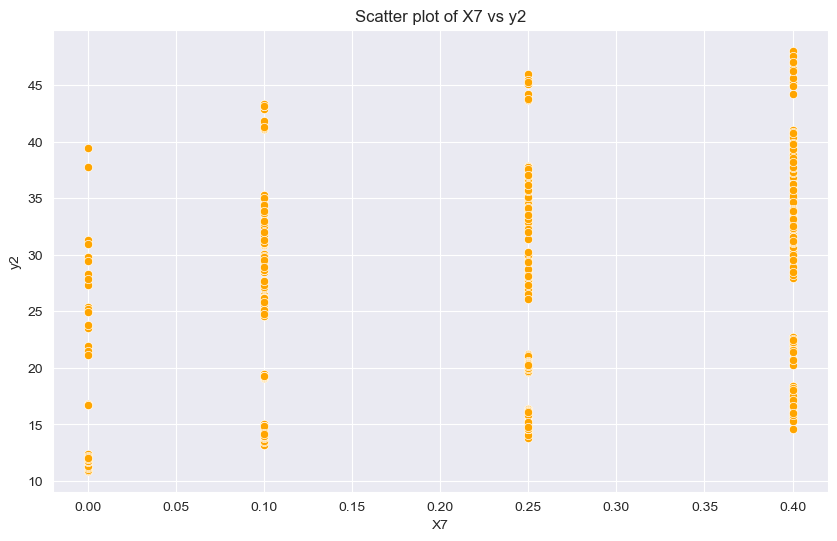

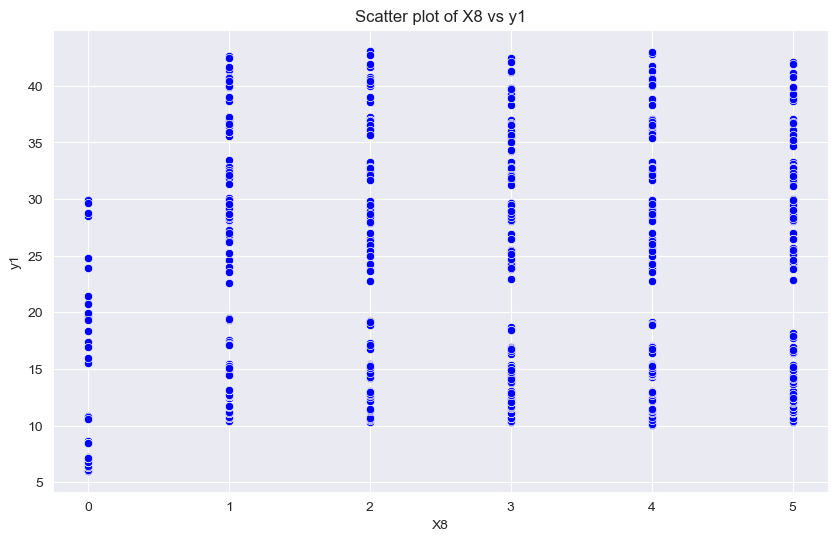

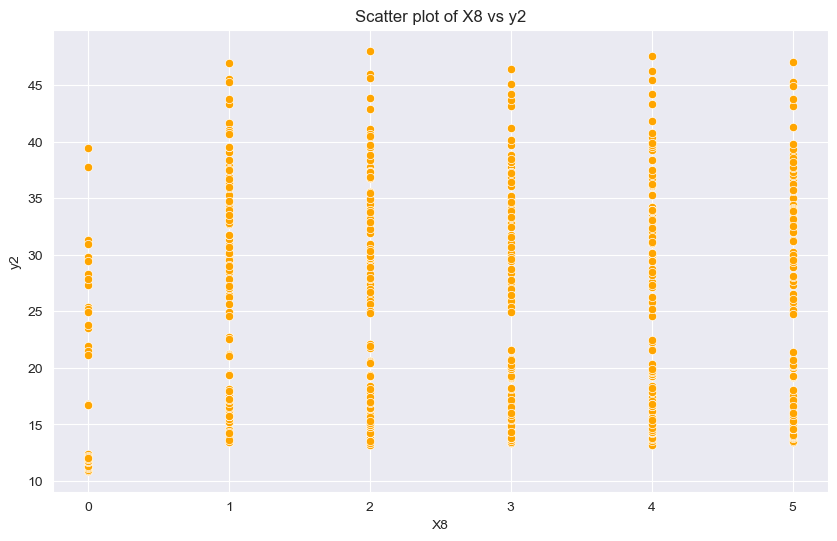

In [15]:
# Scatter plots for each feature against the target variables y1 and y2 with color schemes
for column in X.columns:
    plotting.figure(figsize=(10, 6))
    sns.scatterplot(x=X[column], y=y.iloc[:, 0], color='blue')  # Scatter plot for y1 with blue color
    plotting.title(f'Scatter plot of {column} vs y1')
    plotting.xlabel(column)
    plotting.ylabel('y1')
    plotting.show()

    plotting.figure(figsize=(10, 6))
    sns.scatterplot(x=X[column], y=y.iloc[:, 1], color='orange')  # Scatter plot for y2 with orange color
    plotting.title(f'Scatter plot of {column} vs y2')
    plotting.xlabel(column)
    plotting.ylabel('y2')
    plotting.show()

Correlation Matrix:
              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  4.678592e-17 -3.459372e-17 -2.429499e-17 -5.830058e-17  4.492205e-17   
X7 -2.960552e-15  3.636925e-15 -8.567455e-17 -1.759011e-15  1.489134e-17   
X8 -7.107006e-16  2.438409e-15  2.067384e-16 -1.078071e-15 -2.920613e-17   

              X6            X7            X8  
X1  4.678592e-17 -2.960552e-15 -7.107006e-16  
X2 -3.459372e-17  3.636925e-15  2.438409e-15  
X3 -2.429499e-17 -8.567455e-17  2.067384e-16  
X4 -5.830058e-17 -1.759011e-15 -1.078071e-15  
X5  4.492205e-17  1.489134e-17 -2.920613e-17  
X6  1.000000e

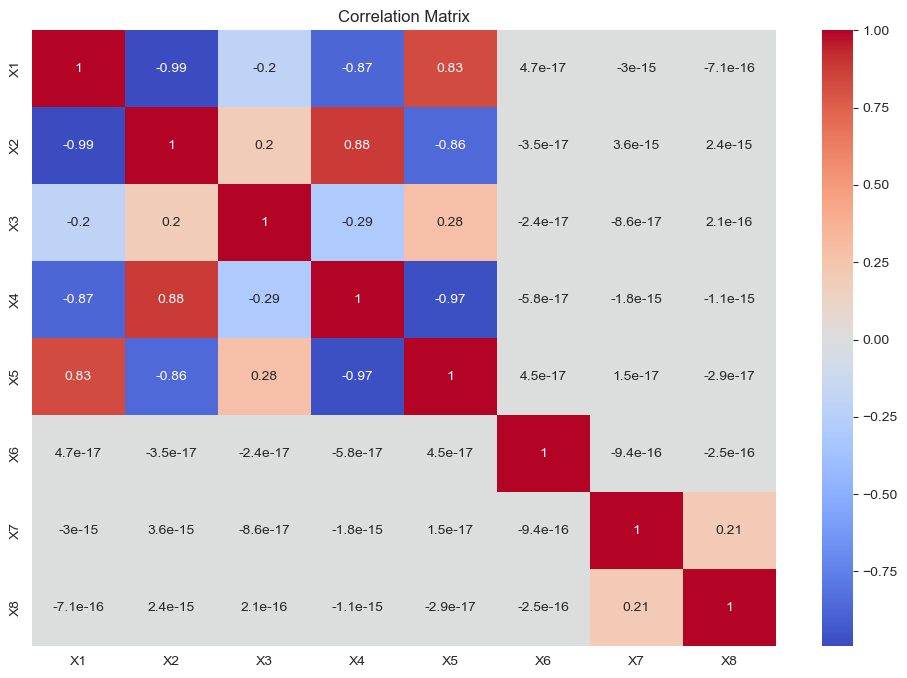

Explained Variance Ratio of each Principal Component:
[0.46286741 0.15498141 0.15162053 0.125      0.09837947]


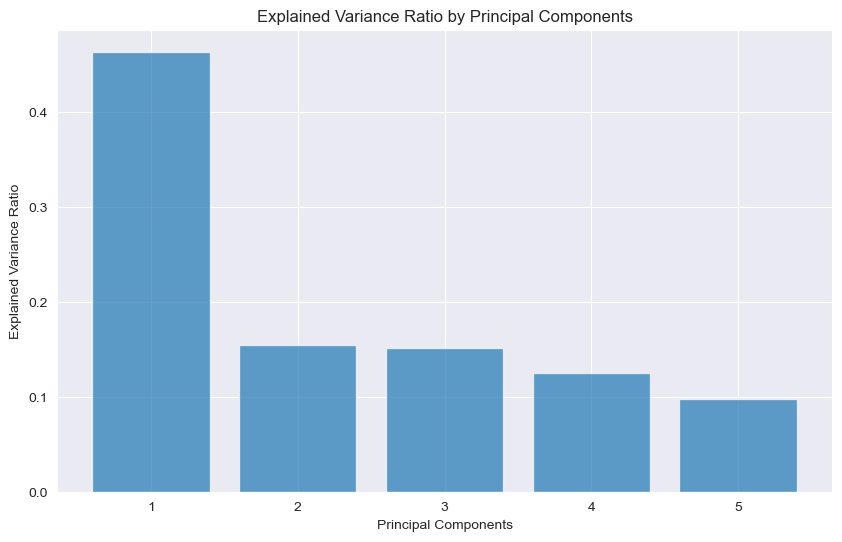

Shape of X after PCA transformation: (768, 5)


In [17]:
# Feature Selection using Correlation Matrix
correlation_matrix = X.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Identify highly correlated features
high_correlation_features = [column for column in correlation_matrix.columns if any(correlation_matrix[column] > 0.9) and column != correlation_matrix.columns[correlation_matrix[column] > 0.9].tolist()[0]]
print("Highly Correlated Features to be Dropped:")
print(high_correlation_features)

# Drop highly correlated features
X_selected = X.drop(columns=high_correlation_features)
print("Shape of X after dropping highly correlated features:", X_selected.shape)

# Visualize the correlation matrix
plotting.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plotting.title('Correlation Matrix')
plotting.show()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio of each Principal Component:")
print(explained_variance)

# Visualize the explained variance ratio
plotting.figure(figsize=(10, 6))
plotting.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plotting.ylabel('Explained Variance Ratio')
plotting.xlabel('Principal Components')
plotting.title('Explained Variance Ratio by Principal Components')
plotting.show()

# Check the shape of the transformed features
print("Shape of X after PCA transformation:", X_pca.shape)

In [22]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=None)

# Initialize the models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=2.0)

# Train the Linear Regression model
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Train the Ridge Regression model
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Linear Regression - Mean Squared Error:", mse_linear)
print("Linear Regression - R^2 Score:", r2_linear)

print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R^2 Score:", r2_ridge)

Linear Regression - Mean Squared Error: 10.850034603423122
Linear Regression - R^2 Score: 0.8832314626714808
Ridge Regression - Mean Squared Error: 10.837576780232855
Ridge Regression - R^2 Score: 0.883365728656628


In [35]:
#Neuro network




# Assuming X_pca and y are already defined as in the previous code

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train.shape[1]))  # Output layer with linear activation

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Neural Network - Mean Squared Error:", mse)
print("Neural Network - R^2 Score:", r2)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 624.2206 - val_loss: 577.1578
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 629.4606 - val_loss: 535.8692
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 578.3201 - val_loss: 461.3193
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 470.1695 - val_loss: 337.5100
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 336.8970 - val_loss: 180.7531
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 158.8728 - val_loss: 66.6895
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 57.3031 - val_loss: 38.7479
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 36.7309 - val_loss: 33.0908
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 26.6525 - val_loss: 31.8870
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30.2459 - val_loss: 30.8620
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 26.0008 - val_loss: 30.1324
Epoch 12/100
16/16 

In [36]:
# Evaluate Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Evaluate Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Evaluate Neural Network model
mse_nn = mean_squared_error(y_test, y_pred)
r2_nn = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression - Mean Squared Error:", mse_linear)
print("Linear Regression - R^2 Score:", r2_linear)

print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R^2 Score:", r2_ridge)

print("Neural Network - Mean Squared Error:", mse_nn)
print("Neural Network - R^2 Score:", r2_nn)

Linear Regression - Mean Squared Error: 14.504374842432838
Linear Regression - R^2 Score: 0.8515773899720394
Ridge Regression - Mean Squared Error: 14.501832272867201
Ridge Regression - R^2 Score: 0.8516027034166218
Neural Network - Mean Squared Error: 6.040613534887453
Neural Network - R^2 Score: 0.9378926634237275
